In [1]:
#DSC540 Final Project
#Shaquiel Pashtunyar

In [2]:
#Imports
import requests as r
import pandas as pd
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Step one is getting all 3 data files from past weeks, altering them to be cleaned up and have similar columns")

Step one is getting all 3 data files from past weeks, altering them to be cleaned up and have similar columns


In [4]:
#Getting HTML Table
url1 = "https://en.wikipedia.org/wiki/List_of_largest_meteorites_on_Earth"
page = r.get(url1)

In [5]:
soup = BeautifulSoup(page.content,'html.parser')

In [6]:
tables = soup.find('table', class_='wikitable')

In [7]:
list = pd.read_html(url1)

In [ ]:
Iron = list[0]
Iron

list[0]

In [9]:
StonyIron = list[1]
StonyIron

,N°,Meteorite name,Found year,Region/Country,Coordinates,Group,Classification,TKW,Fall observed,Image
0,1,Brenham,1882,"Kansas, United States",37°34′57″N 99°09′49″W﻿ / ﻿37.58250°N 99.16361°W,Pallasite,PMG,"4,300 kg (9,500 lb)",No,NaN
1,2,Vaca Muerta,1861,"Antofagasta, Chile",25°45′S 70°30′W﻿ / ﻿25.750°S 70.500°W,Mesosiderite,A1,"3,830 kg (8,440 lb)",No,NaN
2,3,Huckitta,1924,"Northern Territory, Australia",22°22′S 135°46′E﻿ / ﻿22.367°S 135.767°E,Pallasite,PMG,"2,300 kg (5,100 lb)",No,NaN
3,4,Fukang,2000,"Xinjiang, China",44°25′48″N 87°37′48″E﻿ / ﻿44.43000°N 87.63000°E,Pallasite,PMG,"1,003 kg (2,211 lb)",No,NaN
4,5,Imilac,1822,"Antofagasta, Chile",24°12′12″S 68°48′24″W﻿ / ﻿24.20333°S 68.80667°W,Pallasite,PMG,"920 kg (2,030 lb)",No,NaN
5,6,Bondoc,1956,"Southern Tagalog, Philippines",13°31′N 122°27′E﻿ / ﻿13.517°N 122.450°E,Mesosiderite,B4,"888.60 kg (1,959.0 lb)",No,NaN
6,7,Brahin,1810,"Gomel', Belarus",52°30′00″N 30°19′48″E﻿ / ﻿52.50000°N 30.33000°E,Pallasite,PMG,"823 kg (1,814 lb)",No,NaN
7,8,Esquel,1951,"Chubut, Argentina",42°54′00″S 71°19′48″W﻿ / ﻿42.90000°S 71.33000°W,Pallasite,PMG,"755 kg (1,664 lb)",No,NaN
8,9,Krasnojarsk,1749,"Krasnoyarsky Krai, Russia",54°54′N 91°48′E﻿ / ﻿54.900°N 91.800°E,Pallasite,PMG,"700 kg (1,500 lb)",No,NaN
9,10,Jepara,2008,"Jawa Tengah, Indonesia",06°36′S 110°44′E﻿ / ﻿6.600°S 110.733°E,Pallasite,PMG,"499.50 kg (1,101.2 lb)",No,NaN


In [10]:
StonyIron = StonyIron.rename(columns={"TKW": "Mass"})
StonyIron.columns
frames = [Iron, StonyIron]
HTMLSite = pd.concat(frames)

In [11]:
HTMLSite['Mass'] = HTMLSite['Mass'].apply(lambda st: st[st.find("(")+1:st.find(")")])
HTMLSite['Mass'] = HTMLSite['Mass'].str.rstrip(' lb')

In [12]:
HTMLSite = HTMLSite.rename(columns={"Found year":"FoundYear"})
HTMLSite= HTMLSite.drop(["Image"], axis =1)
HTMLSite= HTMLSite.drop(["Fall observed"], axis =1)

In [13]:
HTMLSite= HTMLSite.drop(["Region/Country"], axis =1)
HTMLSite= HTMLSite.drop(["Group"], axis =1)
HTMLSite = HTMLSite.rename(columns={"Meteorite name":"Meteor_Name"})

In [14]:
HTMLSite['Mass'] = HTMLSite['Mass'].str.replace(',', '').astype(float)
HTMLSite.sort_values('Mass', ascending=False)
HTMLSite.iloc[0,[4]] = "19°35′32″S / 17°56′01″E"
HTMLSite = HTMLSite.rename(columns={"N°":"id"})

In [15]:
#Final HTML Table can be seen above
HTMLSite

,id,Meteor_Name,FoundYear,Coordinates,Classification,Mass
0,1,Hoba,1920,".mw-parser-output .geo-default,.mw-parser-outp...",19°35′32″S / 17°56′01″E,130000.0
1,2,Cape York(Ahnighito),1894,76°08′N 64°56′W﻿ / ﻿76.133°N 64.933°W,IIIAB,68068.0
2,3,Campo del Cielo(Gancedo)[3],2016,27°37′48″S 61°42′00″W﻿ / ﻿27.63000°S 61.70000°W,IAB,67900.0
3,4,Campo del Cielo(El Chaco),1969,27°36′34.94″S 61°40′53.31″W﻿ / ﻿27.6097056°S 6...,IAB,63580.0
4,5,Armanty,1898,47°N 88°E﻿ / ﻿47°N 88°E,IIIE,62000.0
5,6,Bacubirito,1863,26°12′N 107°50′W﻿ / ﻿26.200°N 107.833°W,UNG,49000.0
6,7,Cape York(Agpalilik),1963,76°07′59.88″N 64°55′59.88″W﻿ / ﻿76.1333000°N 6...,IIIAB,44300.0
7,8,Mbozi,1930,09°07′N 33°04′E﻿ / ﻿9.117°N 33.067°E,UNG,35000.0
8,9,Willamette,1902,45°22′00.12″N 122°34′58.8″W﻿ / ﻿45.3667000°N 1...,IIIAB,31200.0
9,10,Chupaderos I,1852,27°00′N 105°06′W﻿ / ﻿27.000°N 105.100°W,IIIAB,31116.0


In [16]:
#CSV File
Landings = pd.read_csv(r'meteorite-landings.csv')

In [17]:
Landings = Landings.rename(columns={"year":"FoundYear"})
Landings = Landings.rename(columns={"mass":"Mass"})
Landings = Landings.rename(columns={"name":"Meteor_Name"})
Landings = Landings.rename(columns={"GeoLocation":"Coordinates"})
Landings = Landings.rename(columns={"recclass":"Classification"})

In [18]:
Landings = Landings[np.isfinite(Landings['Mass'])]

In [19]:
Landings= Landings.drop(["reclat"], axis =1)
Landings= Landings.drop(["reclong"], axis =1)
Landings= Landings.drop(["fall"], axis =1)
Landings= Landings.drop(["nametype"], axis =1)

In [20]:
Landings.dropna()

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21.0,1880.0,"(50.775000, 6.083330)"
1,Aarhus,2,H6,720.0,1951.0,"(56.183330, 10.233330)"
2,Abee,6,EH4,107000.0,1952.0,"(54.216670, -113.000000)"
3,Acapulco,10,Acapulcoite,1914.0,1976.0,"(16.883330, -99.900000)"
4,Achiras,370,L6,780.0,1902.0,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...
45711,Zillah 002,31356,Eucrite,172.0,1990.0,"(29.037000, 17.018500)"
45712,Zinder,30409,"Pallasite, ungrouped",46.0,1999.0,"(13.783330, 8.966670)"
45713,Zlin,30410,H4,3.3,1939.0,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,L6,2167.0,2003.0,"(49.789170, 41.504600)"


In [21]:
Landings.dtypes

Meteor_Name        object
id                  int64
Classification     object
Mass              float64
FoundYear         float64
Coordinates        object
dtype: object

In [22]:
Landings.Mass = Landings.Mass.astype(int)
Landings["FoundYear"] = Landings["FoundYear"].astype(str).str[:-2]

In [23]:
#CSV File
Landings.head()

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21,1880,"(50.775000, 6.083330)"
1,Aarhus,2,H6,720,1951,"(56.183330, 10.233330)"
2,Abee,6,EH4,107000,1952,"(54.216670, -113.000000)"
3,Acapulco,10,Acapulcoite,1914,1976,"(16.883330, -99.900000)"
4,Achiras,370,L6,780,1902,"(-33.166670, -64.950000)"


In [24]:
NASAAPI = pd.read_json(r'https://data.nasa.gov/resource/gh4g-9sfh.json')

In [25]:
NASAAPI = NASAAPI.drop([":@computed_region_nnqa_25f4" ,":@computed_region_cbhk_fwbd"], axis=1) 

In [26]:
NASAAPI= NASAAPI.dropna()
NASAAPI['year'] = NASAAPI['year'].str[:4]

In [27]:
NASAAPI= NASAAPI.drop(["nametype"], axis =1)

In [28]:
NASAAPI= NASAAPI.drop(["geolocation"], axis =1)
NASAAPI= NASAAPI.drop(["fall"], axis =1)

In [29]:
NASAAPI["Coordinates"]= "("+NASAAPI["reclat"].astype(str)+", "+NASAAPI["reclat"].astype(str)+")"

In [30]:
NASAAPI = NASAAPI.rename(columns={"name":"Meteor_Name"})
NASAAPI = NASAAPI.rename(columns={"mass":"Mass"})
NASAAPI = NASAAPI.rename(columns={"year":"FoundYear"})
NASAAPI = NASAAPI.rename(columns={"recclass":"Classification"})

In [31]:
NASAAPI= NASAAPI.drop(["reclat"], axis =1)
NASAAPI= NASAAPI.drop(["reclong"], axis =1)

In [32]:
NASAAPI.dtypes

Meteor_Name        object
id                  int64
Classification     object
Mass              float64
FoundYear          object
Coordinates        object
dtype: object

In [33]:
#API Dataset
NASAAPI

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21.0,1880,"(50.775, 50.775)"
1,Aarhus,2,H6,720.0,1951,"(56.18333, 56.18333)"
2,Abee,6,EH4,107000.0,1952,"(54.21667, 54.21667)"
3,Acapulco,10,Acapulcoite,1914.0,1976,"(16.88333, 16.88333)"
4,Achiras,370,L6,780.0,1902,"(-33.16667, -33.16667)"
...,...,...,...,...,...,...
995,Tirupati,24009,H6,230.0,1934,"(13.63333, 13.63333)"
996,Tissint,54823,Martian (shergottite),7000.0,2011,"(29.48195, 29.48195)"
997,Tjabe,24011,H6,20000.0,1869,"(-7.08333, -7.08333)"
998,Tjerebon,24012,L5,16500.0,1922,"(-6.66667, -6.66667)"


In [34]:
print("I have the three files that have been cleaned and processed in past weeks, I will now work to merge them")

I have the three files that have been cleaned and processed in past weeks, I will now work to merge them


In [35]:
import sqlite3

In [36]:
frames = [NASAAPI, Landings, HTMLSite]

In [37]:
result = pd.concat(frames)

In [38]:
result

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21.0,1880,"(50.775, 50.775)"
1,Aarhus,2,H6,720.0,1951,"(56.18333, 56.18333)"
2,Abee,6,EH4,107000.0,1952,"(54.21667, 54.21667)"
3,Acapulco,10,Acapulcoite,1914.0,1976,"(16.88333, 16.88333)"
4,Achiras,370,L6,780.0,1902,"(-33.16667, -33.16667)"
...,...,...,...,...,...,...
10,Seymchan,11,PMG,712.8,1967,62°54′00″N 152°25′48″E﻿ / ﻿62.90000°N 152.43000°E
11,Estherville,12,A3/4,710.0,1879,43°25′N 94°50′W﻿ / ﻿43.417°N 94.833°W
12,Omolon,13,PMG,550.0,1981,64°01′12″N 161°48′30″E﻿ / ﻿64.02000°N 161.80833°E
13,Youxi,14,PMG,481.0,2006,23°03′36″N 118°00′36″E﻿ / ﻿23.06000°N 118.01000°E


In [39]:
result = result[pd.to_numeric(result.FoundYear, errors='coerce').notnull()]
result['FoundYear']= result['FoundYear'].astype(int)

C:\Users\spashtunyar\AppData\Local\Temp\ipykernel_37276\1782897002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['FoundYear']= result['FoundYear'].astype(int)


In [40]:
#Creating Meteor SQL Database
conn = sqlite3.connect('MeteorDB')
c = conn.cursor()

In [41]:
NASAAPI.head(1)

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21.0,1880,"(50.775, 50.775)"


In [42]:
c.execute('CREATE TABLE IF NOT EXISTS NASAAPI (Meteorite Name TEXT, id INTEGER, Classification TEXT, Mass INTEGER, fall TEXT, FoundYear INTEGER, reclat TEXT, reclong TEXT, Coordinates  TEXT)')

In [43]:
#Adding API DF
NASAAPI.to_sql('NASAAPI', conn, if_exists='replace', index = False)

959

In [44]:
Landings.head(1)

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21,1880,"(50.775000, 6.083330)"


In [45]:
c.execute('CREATE TABLE IF NOT EXISTS Landings (Meteorite Name TEXT, id INTEGER, nametype TEXT, Classification TEXT, Mass INTEGER, fall TEXT, FoundYear INTEGER, reclat TEXT, reclong TEXT, Coordinates TEXT)')

In [46]:
#ADDING CSV DF
Landings.to_sql('Landings', conn, if_exists='replace', index = False)

45585

In [47]:
HTMLSite.head(1)

,id,Meteor_Name,FoundYear,Coordinates,Classification,Mass
0,1,Hoba,1920,".mw-parser-output .geo-default,.mw-parser-outp...",19°35′32″S / 17°56′01″E,130000.0


In [48]:
c.execute('CREATE TABLE IF NOT EXISTS HTML (Meteorite Name TEXT, FoundYear INTEGER, id INTEGER, Coordinates TEXT, Classification TEXT, Mass INTEGER)')

In [49]:
#ADDING HTML WIKIPEDIA DF
HTMLSite.to_sql('HTML', conn, if_exists='replace', index = False)

31

In [50]:
print("All three of my data tables have been added as SQL Tables now")

All three of my data tables have been added as SQL Tables now


In [51]:
#Helps me search
Cursor = conn.cursor()

In [52]:
#Checking CSV
Cursor.execute("SELECT * FROM Landings LIMIT 1000;")
records = Cursor.fetchall()
records[1]

('Aarhus', 2, 'H6', 720, '1951', '(56.183330, 10.233330)')

In [53]:
#Checking HTML
Cursor.execute("SELECT * FROM HTML LIMIT 1000;")
records = Cursor.fetchall()
records[1]

(2,
 'Cape York(Ahnighito)',
 1894,
 '76°08′N 64°56′W\ufeff / \ufeff76.133°N 64.933°W',
 'IIIAB',
 68068.0)

In [54]:
#Checking API
Cursor.execute("SELECT * FROM NASAAPI LIMIT 1000;")
records = Cursor.fetchall()
records[1]

('Aarhus', 2, 'H6', 720.0, '1951', '(56.18333, 56.18333)')

In [55]:
print("All three of the DF's have become SQL Tables")

All three of the DF's have become SQL Tables


In [56]:
result.head(1)

,Meteor_Name,id,Classification,Mass,FoundYear,Coordinates
0,Aachen,1,L5,21.0,1880,"(50.775, 50.775)"


In [57]:
c.execute('CREATE TABLE IF NOT EXISTS FINALMETEORTABLE (Meteorite Name TEXT, FoundYear INTEGER, id INTEGER, Coordinates TEXT, Classification TEXT, Mass INTEGER)')

In [58]:
result.to_sql('FINALMETEORTABLE', conn, if_exists='replace', index = False)

46301

In [59]:
Cursor.execute("SELECT * FROM FINALMETEORTABLE LIMIT 1000;")
names = [description[0] for description in Cursor.description]
names

['Meteor_Name', 'id', 'Classification', 'Mass', 'FoundYear', 'Coordinates']

In [60]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM FINALMETEORTABLE
                               ''', conn)

In [61]:
#Table join complete
FinalTable = pd.DataFrame(sql_query, columns = ['Meteor_Name', 'Classification', 'Mass', 'FoundYear'])

In [62]:
FinalTable

,Meteor_Name,Classification,Mass,FoundYear
0,Aachen,L5,21.0,1880
1,Aarhus,H6,720.0,1951
2,Abee,EH4,107000.0,1952
3,Acapulco,Acapulcoite,1914.0,1976
4,Achiras,L6,780.0,1902
...,...,...,...,...
46296,Seymchan,PMG,712.8,1967
46297,Estherville,A3/4,710.0,1879
46298,Omolon,PMG,550.0,1981
46299,Youxi,PMG,481.0,2006


In [63]:
FinalTable.dtypes

Meteor_Name        object
Classification     object
Mass              float64
FoundYear           int64
dtype: object

In [64]:
FinalTable['Mass'].astype(int)

0            21
1           720
2        107000
3          1914
4           780
          ...  
46296       712
46297       710
46298       550
46299       481
46300       437
Name: Mass, Length: 46301, dtype: int32

Text(0.5, 1.0, 'Weight of metoerites found')

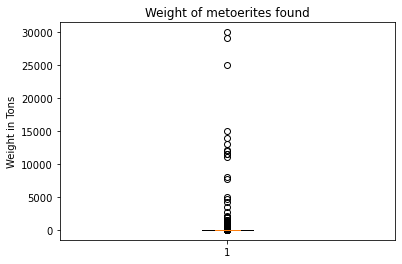

In [65]:
#First plot is to see the sheer weight of the meteor
plt.boxplot(FinalTable.Mass/2000, notch=True)
plt.ylabel('Weight in Tons')
plt.title('Weight of metoerites found')

Text(0.5, 1.0, 'Weight of metoerites found over time')

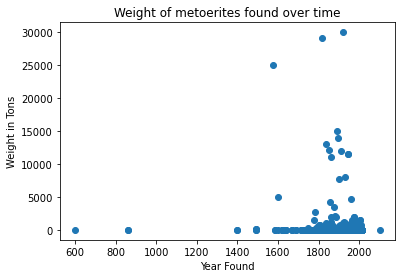

In [66]:
#Found Year of Meteors and the weight
plt.scatter(FinalTable["FoundYear"],FinalTable["Mass"]/2000)
plt.xlabel('Year Found')
plt.ylabel('Weight in Tons')
plt.title('Weight of metoerites found over time')

In [67]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 20 Meteor classifications and their counts')

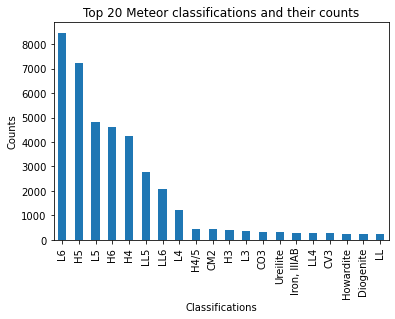

In [68]:
#Finding what was the most common class of Meteors out there
FinalTable['Classification'].value_counts().head(20).plot(kind='bar');
plt.xlabel('Classifications')
plt.ylabel('Counts')
plt.title('Top 20 Meteor classifications and their counts')

Text(0.5, 1.0, 'Top 20 Years for finding Meteors')

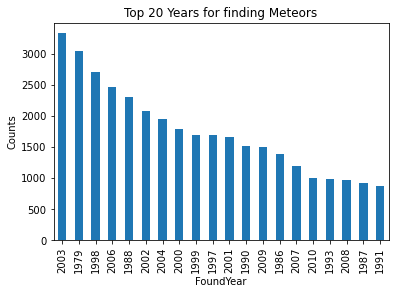

In [69]:
#Finding what was the most common Year for Meteors exploration, interesting that 2003 had quite a spike
FinalTable['FoundYear'].value_counts().head(20).plot(kind='bar');
plt.xlabel('FoundYear')
plt.ylabel('Counts')
plt.title('Top 20 Years for finding Meteors')

In [70]:
FinalTable['Classification'].value_counts().head(10).sum()

36301

In [71]:
FinalTable['Classification'].value_counts().head(10)

L6      8468
H5      7242
L5      4823
H6      4593
H4      4233
LL5     2778
LL6     2075
L4      1232
H4/5     429
CM2      428
Name: Classification, dtype: int64

In [73]:
Top10 =FinalTable['Classification'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Classification Sizes, accounting for 36301 Meteors')

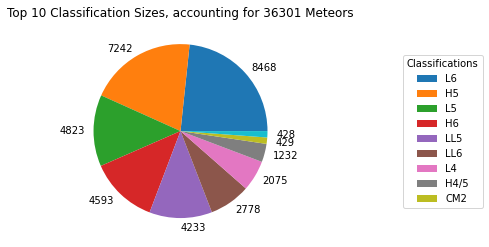

In [77]:
#Pie chart of the meteors
fig, ax = plt.subplots()
ax.pie(FinalTable['Classification'].value_counts().head(10), labels = Top10)
Labels = ['L6', 'H5', 'L5','H6','LL5', 'LL6', 'L4','H4/5','CM2']  
ax.legend(Labels,
          title="Classifications",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title('Top 10 Classification Sizes, accounting for 36301 Meteors')

In [78]:
print("This project has been a major learning experience for me. For one, I had to scrub the data from each of the various sources I got thoroughly. I did not go into too much detail for the scrubbing steps, as those were handled in the last few weeks of the class, but it involved a lot of clean up. The data wrangling had me altering column, removing empty rows, reformatting geolocation information, renaming columns to have the same names so they could be merged and dropping unnecessary data points. This data wrangling component shows the power of clean data. Clean data, although it took some effort to obtain, led to quick insights, and a joined data table that allowed me work through the data quickly. I also learned a bit about making a SQL database within python. This allowed me to take my cleaned data tables and save them in a location that others or myself can call on later. This is a great way to store data and can be repeated in future projects. Although there was a lot of data munging, I tried to stay on the right side of the ethics behind my alterations. I didn’t change any data values to new ones, rather cleaned up the values, and the corrupt rows to be more legible. Some things like changing column names were for uniformity between data sets. I want to make sure I don’t change the integrity of the data, because I would want the conclusions that I come to be the same if someone else performed a similar series of munging actions. This is important to ensure that I have trustworthy results when I share data.")


This project has been a major learning experience for me. For one, I had to scrub the data from each of the various sources I got thoroughly. I did not go into too much detail for the scrubbing steps, as those were handled in the last few weeks of the class, but it involved a lot of clean up. The data wrangling had me altering column, removing empty rows, reformatting geolocation information, renaming columns to have the same names so they could be merged and dropping unnecessary data points. This data wrangling component shows the power of clean data. Clean data, although it took some effort to obtain, led to quick insights, and a joined data table that allowed me work through the data quickly. I also learned a bit about making a SQL database within python. This allowed me to take my cleaned data tables and save them in a location that others or myself can call on later. This is a great way to store data and can be repeated in future projects. Although there was a lot of data munging,